In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv(r"Datasets\iris.csv")
df.sample(10)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
31,32,5.4,3.4,1.5,0.4,Setosa
82,83,5.8,2.7,3.9,1.2,Versicolor
95,96,5.7,3.0,4.2,1.2,Versicolor
50,51,7.0,3.2,4.7,1.4,Versicolor
37,38,4.9,3.1,1.5,0.1,Setosa
136,137,6.3,3.4,5.6,2.4,Virginica
116,117,6.5,3.0,5.5,1.8,Virginica
35,36,5.0,3.2,1.2,0.2,Setosa
128,129,6.4,2.8,5.6,2.1,Virginica
115,116,6.4,3.2,5.3,2.3,Virginica


In [3]:
df.describe()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,148.000000,150.000000,150.000000,148.000000
mean,75.500000,5.856757,3.054000,3.758667,1.197973
std,43.445368,0.825459,0.433594,1.764420,0.760278
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isnull().sum()

Id             0
SepalLength    2
SepalWidth     0
PetalLength    0
PetalWidth     2
Species        0
dtype: int64

In [5]:
df['SepalLength'].fillna(method='ffill', inplace=True)

In [6]:
df['PetalWidth'].fillna(method='ffill', inplace=True)

In [7]:
df.isnull().sum()

Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

C:\Users\mehul\AppData\Local\Temp\ipykernel_15708\1053791007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


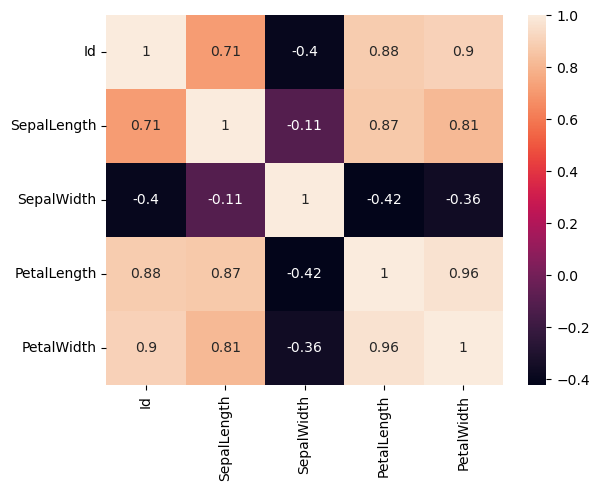

In [8]:
sns.heatmap(df.corr(),annot=True) 
plt.show()

In [9]:
# there are 4 numeric features in the given dataset - SepalLength	SepalWidth	PetalLength	PetalWidth	

In [10]:
# there is 1 nominal featurre in the given dataset - Species

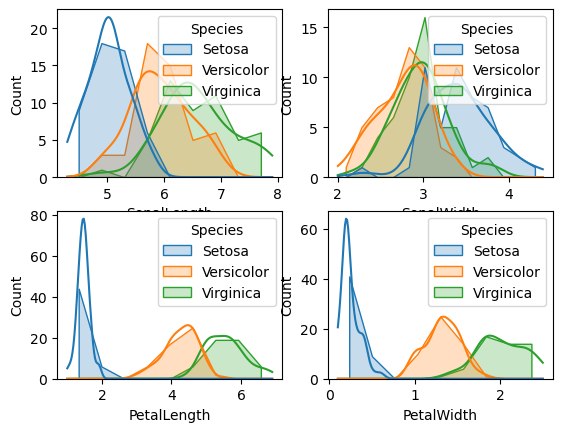

In [11]:
#histogram
fig, axis = plt.subplots(2,2) 
sns.histplot(ax=axis[0,0], data=df, x='SepalLength', hue='Species', element='poly', shrink=0.8, kde= True) 
sns.histplot(ax=axis[0,1], data = df, x='SepalWidth', hue = 'Species', element = 'poly', shrink = 0.8, kde = True) 
sns.histplot(ax=axis[1,0], data = df, x='PetalLength', hue = 'Species', element = 'poly', shrink = 0.8, kde = True) 
sns.histplot(ax=axis[1,1], data = df, x='PetalWidth', hue = 'Species', element = 'poly', shrink = 0.8, kde = True) 
plt.show()


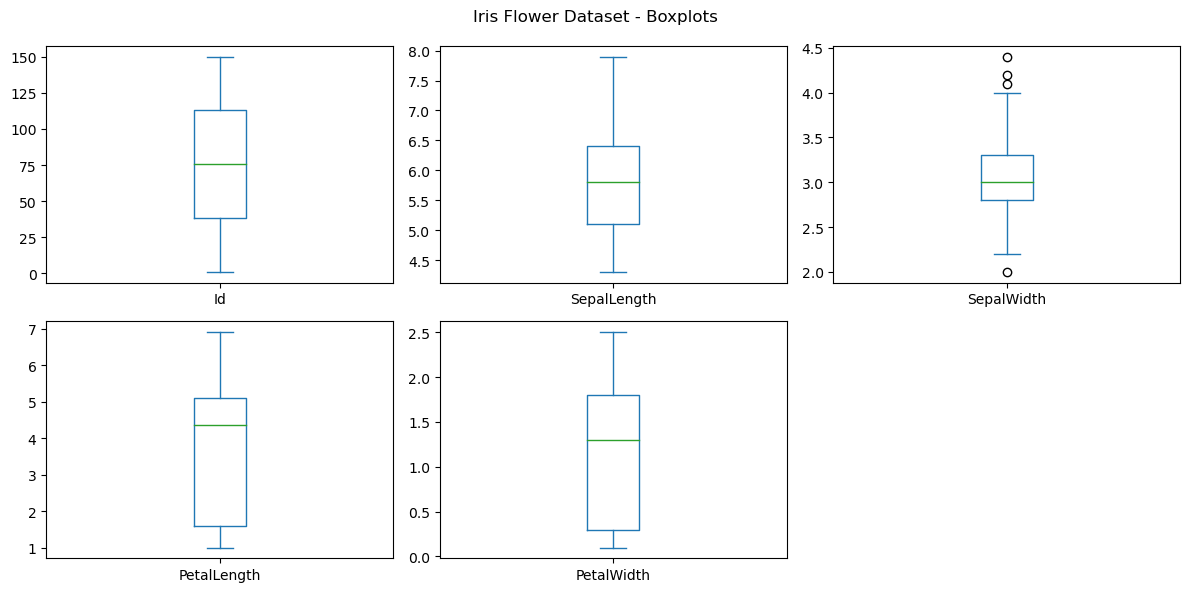

In [12]:
df.plot(kind="box", subplots=True, layout=(2, 3), figsize=(12, 6))
plt.suptitle("Iris Flower Dataset - Boxplots")
plt.tight_layout()
plt.show()

In [13]:
df.shape

(150, 6)

In [18]:
for column in df.columns[1:-1]:
    for specy in df["Species"].unique():
        Specy_type=df[df["Species"]==specy]
        Selected_column=Specy_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg + (2 * std) 
        lower_lmt= avg - (2 * std)
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index # picking outliers' indeces
        df.drop(index=outliers, inplace=True) # dropping outliers
        print(column,specy,outliers)  

SepalLength Setosa Int64Index([14], dtype='int64')
SepalLength Versicolor Int64Index([50, 57], dtype='int64')
SepalLength Virginica Int64Index([106, 131], dtype='int64')
SepalWidth Setosa Int64Index([15, 33, 41], dtype='int64')
SepalWidth Versicolor Int64Index([60, 85], dtype='int64')
SepalWidth Virginica Int64Index([109, 117, 119], dtype='int64')
PetalLength Setosa Int64Index([13, 22, 24, 44], dtype='int64')
PetalLength Versicolor Int64Index([93, 98], dtype='int64')
PetalLength Virginica Int64Index([105, 118, 122], dtype='int64')
PetalWidth Setosa Int64Index([23], dtype='int64')
PetalWidth Versicolor Int64Index([70], dtype='int64')
PetalWidth Virginica Int64Index([134], dtype='int64')


In [19]:
df.shape

(124, 6)